In [169]:
from selenium import webdriver
from msedge.selenium_tools import Edge, EdgeOptions
options = EdgeOptions()
options.use_chromium = True
options.binary_location = r"C:\Program Files (x86)\Microsoft\Edge\Application\msedge.exe" # 浏览器的位置
driver = Edge(options=options, executable_path=r"./msedgedriver.exe") # 相应的浏览器的驱动位置
driver.get("https://www.520ssr.top/user")

C:\Users\Admin\AppData\Local\Temp\ipykernel_4444\3020730458.py:6: DeprecationWarning: Selenium Tools for Microsoft Edge is deprecated. Please upgrade to Selenium 4 which has built-in support for Microsoft Edge (Chromium): https://docs.microsoft.com/en-us/microsoft-edge/webdriver-chromium/#upgrading-from-selenium-3
  driver = Edge(options=options, executable_path=r"./msedgedriver.exe") # 相应的浏览器的驱动位置


In [170]:
driver.find_element_by_id("email").send_keys("762307667@qq.com")
driver.find_element_by_id("password").send_keys("caiwei940606")

In [166]:
import base64
from PIL import Image
from io import BytesIO
def get_image(ele):
    time.sleep(2)
    im_bg_b64 = driver.execute_script(
    f'return document.getElementsByClassName("{ele}")[0].toDataURL("image/png");')
    # base64 encoded image
    im_b64 = im_bg_b64.split(',')[-1]
    im_bytes = base64.b64decode(im_b64)
    # with open(f'./{img}', 'wb') as f:
    #     f.write(im_bytes)
    return Image.open(BytesIO(im_bytes))

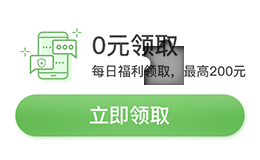

In [115]:

bg_img

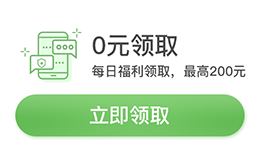

In [116]:

full_img

In [81]:
def get_dis_use_same_pixel(im_fullbg, im_bg):
        """
        对比是否是相同像素确定移动距离
        """
        pix_1 = im_fullbg.load()
        pix_2 = im_bg.load()
        threshold = 60

        for x in range(im_fullbg.size[0]):
            # 垂直方向不同像素的计数
            vert_count = 0
            for y in range(im_fullbg.size[1]):
                p_1 = pix_1[x, y]
                p_2 = pix_2[x, y]
                # 找到像素不同的点
                if abs(p_1[0] - p_2[0]) > threshold and abs(p_1[1] - p_2[1]) > threshold and abs(p_1[2] - p_2[2]) > threshold:
                    vert_count += 1
                    # 如果是一条直线返回横坐标距离，测试下来10个像素结果较好
                    # print(vert_count, x)
                    if vert_count > 10:
                        return x

In [117]:
x_offset

144

In [17]:
def simulate_human_drag_x(driver, element, offset_x):
        """
        简单拖拽模仿人的拖拽：快速沿着X轴拖动，多拖一点然后再回来，再暂停，释放
        """
        action_chains = webdriver.ActionChains(driver)
        # 点击，准备拖拽
        action_chains.click_and_hold(element)
        action_chains.pause(0.3)
        action_chains.move_by_offset(offset_x + 7, 0)
        action_chains.pause(0.8)
        action_chains.move_by_offset(-7, 0)
        action_chains.pause(0.6)
        action_chains.release()
        action_chains.perform()

In [171]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
driver.find_element_by_xpath(r'//*[@id="login_form"]/div[3]/div/div/div[3]').click()
bg_img = get_image("geetest_canvas_bg geetest_absolute")
full_img = get_image("geetest_canvas_fullbg geetest_fade geetest_absolute")
x_offset = get_dis_use_same_pixel(full_img, bg_img)
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".geetest_slider_button")))
button = driver.find_element_by_css_selector(".geetest_slider_button")
# x_offset -= 3
for x in range(-3, 3):
    print(x)
    print(f"slide {x_offset + x} pixel")
    simulate_human_drag_x(driver,button, x_offset + x)
    time.sleep(3)
    if not driver.find_element_by_class_name('geetest_fullpage_click_box').is_displayed():
        break

-3
slide 113 pixel


In [146]:
# //*[@id="kt_body"]/div[3]/div[2]/div[1]/div
print(driver.find_element_by_class_name('geetest_fullpage_click_box').is_enabled())
print(driver.find_element_by_class_name('geetest_fullpage_click_box').is_displayed())
print(driver.find_element_by_class_name('geetest_fullpage_click_box').is_selected())

True
False
False


In [85]:
def get_track(distance):
        """
        根据偏移量获取移动轨迹
        :param distance: 偏移量
        :return: 移动轨迹
        """
        # 移动轨迹
        track = []
        # 当前位移
        current = 0
        # 减速阈值
        mid = distance * 4 / 5
        # 计算间隔
        t = 0.2
        # 初速度
        v = 0
        while current < distance:
            if current < mid:
                # 加速度为正2
                a = 2
            else:
                # 加速度为负3
                a = -3
            # 初速度v0
            v0 = v
            # 当前速度v = v0 + at
            v = v0 + a * t
            # 移动距离x = v0t + 1/2 * a * t^2
            move = v0 * t + 1 / 2 * a * t * t
            # 当前位移
            current += move
            # 加入轨迹
            track.append(round(move))
        return track

In [96]:
# x_offset -= 10
track = get_track(x_offset)

In [94]:
import random
def move_to_gap(slider, track):
        """
        拖动滑块到缺口处
        :param slider: 滑块
        :param track: 轨迹
        :return:
        """
        webdriver.ActionChains(driver).click_and_hold(slider).perform()
        for x in track:
            webdriver.ActionChains(driver).move_by_offset(xoffset=x, yoffset=0).perform()
            # time.sleep(0.1 * random.random())
        webdriver.ActionChains(driver).release().perform()

In [89]:
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
WebDriverWait(driver, 20).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".geetest_slider_button")))
button = driver.find_element_by_css_selector(".geetest_slider_button")

In [97]:

move_to_gap(button, track)

In [172]:
driver.find_element_by_id("login_submit").click()

In [180]:
driver.find_element_by_link_text("已签到").is_displayed()

True

In [186]:
WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.LINK_TEXT, "已签到"))).is_displayed()

True